In [2]:
import pandas as pd
import numpy as np
import os
import datetime
import time
import glob
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#matplot lib notebooks display command
%matplotlib inline

#SET OPTIONS
pd.options.display.float_format = '{:,.2f}'.format
#GLOBAL VARIABLES
today = datetime.date.today()
#cwd = os.getcwd()

In [3]:
#load dataset
non_auto_df = pd.read_csv("../Data/non_automated_invoices_with_acct_info_sample.csv", encoding='utf-8')
non_auto_df.dtypes

INVOICE_ID            object
ACCT_ID               object
CR_CHK_CD             object
CUST_STAT             object
PYDX_SCRE_NUM        float64
INDUSTRY_NM           object
CURR_NUM_LICENSES    float64
TRUE_LOGIN           float64
USAGE_SCORE          float64
EMP_CNT              float64
CRNCY_ISO_CD          object
CUSTOMER_REVENUE     float64
COLLECTOR             object
COLLECTION_STATUS     object
HAS_TAX_EXEMP           bool
ESCALATION_STATUS     object
BILLING_COUNTRY       object
BILLING_LANGUAGE      object
PAYMENT_TERM          object
PAYMENT_TYPE          object
HAS_30DAY_EXTXN         bool
PAST_DUE_FLG            bool
LATE_PMT_GT_30          bool
DAYS_TO_PAY            int64
CURRENCY_CODE         object
TOTAL_AMOUNT         float64
dtype: object

# Feature cleaning

### CR_CHK_CD

In [4]:
for el in pd.unique(non_auto_df['CR_CHK_CD']):
    print(el)

Prepayment
Approved
0
Defer Revenue
Credit Data Not Found
Credit Hold
Payment Plan
Bankruptcy
Not Required
Write Off - Bad Debt


### CUST_STAT

In [5]:
for el in pd.unique(non_auto_df['CUST_STAT']):
    print(el)

Direct Customer
Attrited Customer
Indirect Customer
Prospect


### INDUSTRY_NM

In [6]:
for el in pd.unique(non_auto_df['INDUSTRY_NM']):
    print(el)


Agriculture & Mining
Healthcare & Life Sciences
Retail & CG
Financial Services
Public Sector
Manufacturing
Communications & Media
Engineering, Construction, & Real Estate
High Tech
Professional Services
Education
Other
Travel, Transportation, & Hospitality
0
High_Tech
Nonprofit Institutions
Media & Communications
ITTelecoms
Media
High-Tech Software/Services
Health_Care
Professional_Services
Computer Software
Fraud
Energy & Utilities
Computer hardware/software/technology
Consulting
Higher Education
Software & Programming
Communications
Healthcare
Public_Sector
Technology
Computer Services
Media & Telecom
Technology - Software & Services
Payment
Automotive
Public Sector and Government
Consumer Products & Retail
Business Services
Financial_Services
Retail & Consumer Goods
Software & Technology
Hospitality, Travel, & Transportation
Ratings & Reviews
Aerospace & Defense
IT／通信
Communications Services
Retail_Consumer


In [7]:
'''
“Communications & Media” ==== “Media & Communications” === “Media” ====“Media & Telecom”===“Communications Services”====“ITTelecoms” = “Media & Telecom” = “IT／通信”
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'IT／通信']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media & Telecom']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Communications & Media']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media & Communications']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media & Telecom']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Communications Services']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'ITTelecoms']='Media_and_Telecom'

In [8]:
'''
Healthcare and Life Sciences = “Health_Care” = Healthcare & Life Sciences = Healthcare
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Healthcare and Life Sciences']='Health_Care'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Healthcare & Life Sciences']='Health_Care'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Healthcare']='Health_Care'


In [9]:
'''
Retail and CG = Consumer Products & Retail = Retail & Consumer Goods = “Retail_Consumer” == Retail & CG
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Retail and CG']='Retail_Consumer'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Consumer Products & Retail']='Retail_Consumer'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Retail & Consumer Goods']='Retail_Consumer'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Retail & CG']='Retail_Consumer'



In [10]:
'''
Financial Services = Financial_Services
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Financial Services']='Financial_Services'


In [11]:
'''
Public sector == “Public Sector & Government” === Public Sector and Government ==== Public_Sector == Public Sector
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public Sector & Government']='Public sector'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public Sector and Government']='Public sector'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public_Sector']='Public sector'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public Sector']='Public sector'

In [12]:
'''
“High_Tech” === “High-Tech Software/Services” == “Computer Software”. === 
“Computer hardware/software/technology” == “Software & Programming” === “Technology - Software & Services”
==== Software & Technology === High Tech === Technology === Computer Services
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'High-Tech Software/Services']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Computer Software']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Computer hardware/software/technology']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Software & Programming']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Technology - Software & Services']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Software & Technology']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'High Tech']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Technology']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Computer Services']='High_Tech'

In [13]:
'''
“Professional Services” = “Professional_Services”
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Professional Services']='Professional_Services'


In [14]:
'''
Education ==== Higher Education
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Higher Education']='Education'


In [15]:
'''
Travel, Transportation, & Hospitality======Hospitality, Travel, & Transportation
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Travel, Transportation, & Hospitality']='Hospitality, Travel, & Transportation'

In [16]:
for el in pd.unique(non_auto_df['INDUSTRY_NM']):
    print(el)


Agriculture & Mining
Health_Care
Retail_Consumer
Financial_Services
Public sector
Manufacturing
Media_and_Telecom
Engineering, Construction, & Real Estate
High_Tech
Professional_Services
Education
Other
Hospitality, Travel, & Transportation
0
Nonprofit Institutions
Fraud
Energy & Utilities
Consulting
Communications
Payment
Automotive
Business Services
Ratings & Reviews
Aerospace & Defense


### CRNCY_ISO_CD

In [17]:

for el in pd.unique(non_auto_df['CRNCY_ISO_CD']):
    print(el)


USD
Health_Care
Retail_Consumer
Financial_Services
Public sector
Media_and_Telecom
High_Tech
Professional_Services
EUR
JPY
Hospitality, Travel, & Transportation
AUD
CAD
GBP
SEK
Education


In [18]:
non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Health_Care']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT
1,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
7,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
24,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
27,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
44,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97263,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
97285,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
97290,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
97317,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care


In [19]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Health_Care'].index)

In [20]:
non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Health_Care']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT


In [21]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Retail_Consumer'].index)

In [22]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Financial_Services'].index)

In [23]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Public sector'].index)

In [24]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Media_and_Telecom'].index)

In [25]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'High_Tech'].index)

In [26]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Professional_Services'].index)

In [27]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Hospitality, Travel, & Transportation'].index)

In [28]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Education'].index)

In [29]:

for el in pd.unique(non_auto_df['CRNCY_ISO_CD']):
    print(el)


USD
EUR
JPY
AUD
CAD
GBP
SEK


### COLLECTION_STATUS

In [30]:

for el in pd.unique(non_auto_df['COLLECTION_STATUS']):
    print(el)


Non Responsive
Promise To Pay
NONE
Courtesy Contact
Willingness To Pay
Refusal To Pay
Invoice Correction Required
Non-Responsive
E-invoicing
Tax
Financial Inability To Pay
Red Account


In [31]:
'''
Non Responsive ==== Non-Responsive
'''
non_auto_df.loc[lambda df: df['COLLECTION_STATUS'] == 'Non Responsive']='Non-Responsive'


In [32]:
non_auto_df.loc[lambda df: df['COLLECTION_STATUS'] == 'Tax']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT
1089,a2d0M0000037Rm4QAE,0013000001Jz8LdAAJ,0,Direct Customer,0.00,Manufacturing,53.00,89.00,86.00,"2,200.00",...,BR,Portuguese (Brazilian),Net30,Check,True,False,True,33,USD,284.60
2907,a2d0M0000038ZRQQA2,0010M00001QqVxcQAF,0,Direct Customer,0.00,Manufacturing,79.00,68.00,83.00,"1,000.00",...,BR,Portuguese (Brazilian),Net30,Wire Transfer,True,False,True,39,USD,"4,236.59"
4335,a2d0M000001xeqfQAA,0013000000rpFcOAAU,Approved,Direct Customer,200.00,Manufacturing,39.00,82.00,82.00,50.00,...,CO,English,Net30,Wire Transfer,True,False,True,168,USD,"2,758.75"
4648,a2d0M000002yVJaQAM,0010M00001YFi4LQAT,0,Direct Customer,0.00,Manufacturing,27.00,49.00,92.00,"1,000.00",...,GT,English,Net30,Wire Transfer,True,False,True,31,USD,"3,527.12"
5266,a2d0M0000039m1rQAA,0010M00001Sq2szQAB,0,Direct Customer,0.00,Manufacturing,5.00,57.00,85.00,35.00,...,BR,English,Net30,Wire Transfer,True,False,False,10,USD,"1,499.44"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93590,a2d0M000002GlxqQAC,00130000016jnMfAAI,0,Direct Customer,0.00,Manufacturing,8.00,62.00,84.00,7.00,...,BR,Portuguese (Brazilian),Net30,Wire Transfer,True,False,True,33,USD,"1,628.71"
93769,a2d0M0000037PqhQAE,0010M00001QqxENQAZ,0,Direct Customer,0.00,"Engineering, Construction, & Real Estate",40.00,82.00,86.00,290.00,...,BR,Portuguese (Brazilian),Net30,Wire Transfer,True,False,True,40,USD,669.29
95026,a2d0M000002alwsQAA,0010M00001QkVqPQAV,0,Direct Customer,0.00,Agriculture & Mining,30.00,53.00,61.00,500.00,...,AR,Spanish,Net30,Wire Transfer,True,False,True,72,USD,"20,682.00"
95385,a2d0M000002warhQAA,0010M00001QqcO9QAJ,0,Direct Customer,0.00,Manufacturing,33.00,50.00,56.00,500.00,...,BR,Portuguese (Brazilian),Net30,Wire Transfer,True,False,False,13,USD,"4,828.73"


### ESCALATION_STATUS

In [33]:


for el in pd.unique(non_auto_df['ESCALATION_STATUS']):
    print(el)


Non-Responsive
NONE
Pending AE Response/Involvement
Awaiting AE Involvement/Action
Pending Management Action
Assigned To Bad Debt
Escalated To Order Management


In [34]:
non_auto_df.loc[lambda df: df['ESCALATION_STATUS'] == 'Assigned To Bad Debt']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT
54801,a2d0M000002Go1IQAS,0010M00001UEg5aQAD,Prepayment,Prospect,10.00,Manufacturing,0.00,0.00,86.00,50.00,...,US,English,Net30,Check,True,False,True,126,USD,"13,325.99"


In [35]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['ESCALATION_STATUS'] == 'Assigned To Bad Debt'].index)

### BILLING_COUNTRY

In [36]:

for el in pd.unique(non_auto_df['BILLING_COUNTRY']):
    print(el)

Non-Responsive
US
GB
JP
AU
BR
ES
IT
IL
IN
TH
CA
TW
BE
FI
NO
AE
DE
NL
CN
HK
CO
FR
DK
PT
AT
CH
CL
SG
SA
SE
SI
MX
PH
ID
LU
IE
RU
SN
KE
PE
EG
CZ
ZA
PL
NZ
KR
PA
RO
GT
BG
VN
LB
HU
DO
MK
AR
PR
CR
HR
MT
MY
LI
GR
MA
CY
BY
QA
PK
NG
LT
MU
SV
EC
TT
ZM
LK
TR
BH
JE
KH
AD
JO
SK
TZ
EE
BA
IS
MC
VE
GE
UA
LS
PY
CM
OM
TN
RS
NI
UG
GH


### BILLING_LANGUAGE 

In [37]:

for el in pd.unique(non_auto_df['BILLING_LANGUAGE']):
    print(el)


Non-Responsive
English
Japanese
Portuguese (Brazilian)
Spanish
Italian
French
German
Chinese (Simplified)
Korean
Dutch
Swedish


### PAYMENT_TERM 

In [38]:

for el in pd.unique(non_auto_df['PAYMENT_TERM']):
    print(el)

Non-Responsive
Net30
Net60
Net30EOM
Net45
Net0
Net60EOM


### PAYMENT_TYPE

In [39]:

for el in pd.unique(non_auto_df['PAYMENT_TYPE']):
    print(el)

Non-Responsive
Check
Wire Transfer


### CURRENCY_CODE

In [40]:
'''
IS this redundant with CurrencyISO?
'''
for el in pd.unique(non_auto_df['CURRENCY_CODE']):
    print(el)

Non-Responsive
USD
GBP
JPY
AUD
EUR
CAD
SEK


In [41]:
### DAYS_TO_PAY

In [42]:
for el in pd.unique(non_auto_df['DAYS_TO_PAY']):
    print(el)

Non-Responsive
95
-59
5
10
13
-9
2
8
36
51
79
-17
-20
3
11
40
25
123
-12
41
15
12
19
6
29
-1
-4
-2
27
46
-3
16
1
-25
-10
84
61
17
38
53
9
55
20
117
32
22
60
70
42
4
82
37
102
67
26
34
113
33
43
49
-27
65
-23
21
-8
45
39
7
54
56
-6
528
72
14
44
-5
210
88
62
35
63
179
52
24
68
251
112
57
23
50
-7
-11
48
28
0
-16
-13
121
81
18
74
-24
47
-19
89
160
31
246
490
77
119
80
203
59
-35
-28
143
92
122
91
58
66
73
93
71
30
87
86
120
-15
180
149
147
130
125
-18
111
99
168
148
105
126
153
-14
76
140
375
78
502
-22
190
-30
100
186
-21
98
103
144
109
97
135
193
136
292
127
101
173
-26
-44
138
315
145
199
132
108
141
129
96
85
-33
202
75
-29
169
-45
277
114
154
128
69
-51
221
280
137
253
281
182
234
390
116
-42
386
268
146
155
319
64
164
191
163
-43
90
106
240
497
183
83
167
350
216
104
282
171
-34
187
241
214
487
94
184
142
157
269
-37
124
327
493
176
-31
222
170
185
332
110
195
166
192
257
174
156
133
152
118
392
219
115
-40
198
151
224
495
485
150
178
-32
107
261
340
177
188
209
242
134
320
-36
211


In [43]:
# CUTOFF AT 270 days (9 months) and non-responsive 
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['DAYS_TO_PAY'] == 'Non-Responsive'].index)
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['DAYS_TO_PAY'] >270].index)

In [44]:
for el in pd.unique(non_auto_df['DAYS_TO_PAY']):
    print(el)

95
-59
5
10
13
-9
2
8
36
51
79
-17
-20
3
11
40
25
123
-12
41
15
12
19
6
29
-1
-4
-2
27
46
-3
16
1
-25
-10
84
61
17
38
53
9
55
20
117
32
22
60
70
42
4
82
37
102
67
26
34
113
33
43
49
-27
65
-23
21
-8
45
39
7
54
56
-6
72
14
44
-5
210
88
62
35
63
179
52
24
68
251
112
57
23
50
-7
-11
48
28
0
-16
-13
121
81
18
74
-24
47
-19
89
160
31
246
77
119
80
203
59
-35
-28
143
92
122
91
58
66
73
93
71
30
87
86
120
-15
180
149
147
130
125
-18
111
99
168
148
105
126
153
-14
76
140
78
-22
190
-30
100
186
-21
98
103
144
109
97
135
193
136
127
101
173
-26
-44
138
145
199
132
108
141
129
96
85
-33
202
75
-29
169
-45
114
154
128
69
-51
221
137
253
182
234
116
-42
268
146
155
64
164
191
163
-43
90
106
240
183
83
167
216
104
171
-34
187
241
214
94
184
142
157
269
-37
124
176
-31
222
170
185
110
195
166
192
257
174
156
133
152
118
219
115
-40
198
151
224
150
178
-32
107
261
177
188
209
242
134
-36
211
196
258
-49
161
238
201
259
226
247
228
232
208
-39
197
172
131
218
205
243
213
162
236
-53
139
-41
270
-46
158

## Change back to correct dtypes

In [45]:
non_auto_df.dtypes

INVOICE_ID           object
ACCT_ID              object
CR_CHK_CD            object
CUST_STAT            object
PYDX_SCRE_NUM        object
INDUSTRY_NM          object
CURR_NUM_LICENSES    object
TRUE_LOGIN           object
USAGE_SCORE          object
EMP_CNT              object
CRNCY_ISO_CD         object
CUSTOMER_REVENUE     object
COLLECTOR            object
COLLECTION_STATUS    object
HAS_TAX_EXEMP        object
ESCALATION_STATUS    object
BILLING_COUNTRY      object
BILLING_LANGUAGE     object
PAYMENT_TERM         object
PAYMENT_TYPE         object
HAS_30DAY_EXTXN      object
PAST_DUE_FLG         object
LATE_PMT_GT_30       object
DAYS_TO_PAY          object
CURRENCY_CODE        object
TOTAL_AMOUNT         object
dtype: object

Should be: 
    
INVOICE_ID            object
ACCT_ID               object
CR_CHK_CD             object
CUST_STAT             object
PYDX_SCRE_NUM        float64
INDUSTRY_NM           object
CURR_NUM_LICENSES    float64
TRUE_LOGIN           float64
USAGE_SCORE          float64
EMP_CNT              float64
CRNCY_ISO_CD          object
CUSTOMER_REVENUE     float64
COLLECTOR             object
COLLECTION_STATUS     object
HAS_TAX_EXEMP           bool
ESCALATION_STATUS     object
BILLING_COUNTRY       object
BILLING_LANGUAGE      object
PAYMENT_TERM          object
PAYMENT_TYPE          object
HAS_30DAY_EXTXN         bool
PAST_DUE_FLG            bool
LATE_PMT_GT_30          bool
DAYS_TO_PAY            int64
CURRENCY_CODE         object
TOTAL_AMOUNT         float64
dtype: object

In [46]:
'''
Recast after modifying
'''
non_auto_df.loc[:,'PYDX_SCRE_NUM'] = non_auto_df.loc[:,'PYDX_SCRE_NUM'].astype('float64')
non_auto_df[['PYDX_SCRE_NUM', 'CURR_NUM_LICENSES', 'TRUE_LOGIN', 'USAGE_SCORE',\
             'EMP_CNT', 'CUSTOMER_REVENUE','DAYS_TO_PAY', 'TOTAL_AMOUNT' \
            ]] = non_auto_df[['PYDX_SCRE_NUM', 'CURR_NUM_LICENSES', 'TRUE_LOGIN', \
                              'USAGE_SCORE', 'EMP_CNT', 'CUSTOMER_REVENUE','DAYS_TO_PAY', 'TOTAL_AMOUNT'\
            ]].astype('float64')

non_auto_df[['HAS_TAX_EXEMP', 'HAS_30DAY_EXTXN', 'PAST_DUE_FLG', 'LATE_PMT_GT_30']] = \
non_auto_df[['HAS_TAX_EXEMP', 'HAS_30DAY_EXTXN', 'PAST_DUE_FLG', 'LATE_PMT_GT_30']].astype('bool')
non_auto_df.dtypes

INVOICE_ID            object
ACCT_ID               object
CR_CHK_CD             object
CUST_STAT             object
PYDX_SCRE_NUM        float64
INDUSTRY_NM           object
CURR_NUM_LICENSES    float64
TRUE_LOGIN           float64
USAGE_SCORE          float64
EMP_CNT              float64
CRNCY_ISO_CD          object
CUSTOMER_REVENUE     float64
COLLECTOR             object
COLLECTION_STATUS     object
HAS_TAX_EXEMP           bool
ESCALATION_STATUS     object
BILLING_COUNTRY       object
BILLING_LANGUAGE      object
PAYMENT_TERM          object
PAYMENT_TYPE          object
HAS_30DAY_EXTXN         bool
PAST_DUE_FLG            bool
LATE_PMT_GT_30          bool
DAYS_TO_PAY          float64
CURRENCY_CODE         object
TOTAL_AMOUNT         float64
dtype: object

In [47]:
#Normalize Numeric fields

def pre_process(df, dropcols=None):
    '''
    The pre_process function that will return a transformed dataframe
    Notes:
        1) dropcols should be a list
        2) integer varibles are transformed using mean normalization
    '''
    #drop columns input by the user
    if dropcols is not None:
        df = df.drop(columns=dropcols)
    print("columns dropped")
    
    #loop through remaining columns and apply the appropreate transform
    for i in df.columns:
        print(i)
        '''
        #mean normalization for int variables
        if df[i].dtype == "int64" or df[i].dtype == 'float64':
            mean = df[i].mean()
            if (df[i].max() - df[i].min()) == 0:
                denom = 1
                print("useless int column", i)
                break
            else:
                denom = (df[i].max() - df[i].min())
            df[i] = df[i].apply(lambda x: float(x - mean) / denom)
        '''
        #convert bool values to 1 and 0
        if df[i].dtype == "bool":
            df[i] = df[i].map({True: 1, False: 0})
        elif df[i].dtype == "object":
            df = pd.get_dummies(df, columns=[i], prefix = [i], dtype="int8") #, sparse=True
        
    return df



In [48]:
print("executed")
clean_df = pre_process(non_auto_df, dropcols=['INVOICE_ID', 'ACCT_ID'])
#clean_df.to_csv('../Data/clean_df.csv')
#dtypes_df = clean_df.dtypes.to_frame('dtypes').reset_index()
#dtypes_df.to_csv('../Data/clean_dtypes.csv')
print("done")

executed
columns dropped
CR_CHK_CD
CUST_STAT
PYDX_SCRE_NUM
INDUSTRY_NM
CURR_NUM_LICENSES
TRUE_LOGIN
USAGE_SCORE
EMP_CNT
CRNCY_ISO_CD
CUSTOMER_REVENUE
COLLECTOR
COLLECTION_STATUS
HAS_TAX_EXEMP
ESCALATION_STATUS
BILLING_COUNTRY
BILLING_LANGUAGE
PAYMENT_TERM
PAYMENT_TYPE
HAS_30DAY_EXTXN
PAST_DUE_FLG
LATE_PMT_GT_30
DAYS_TO_PAY
CURRENCY_CODE
TOTAL_AMOUNT
done


In [156]:
clean_df.to_csv('../Data/clean_with_collector_df.csv')
print("done")

done


In [49]:

X = clean_df.loc[:, clean_df.columns != "DAYS_TO_PAY"]
y = clean_df['DAYS_TO_PAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print("done")

done


# Linear Regression for accross all DAYS_TO_PAY

executed start
Model using 0.2 as the regularization coefficient completed in 0.231sec
Model using 0.21000000000000002 as the regularization coefficient completed in 0.265sec
Model using 0.22000000000000003 as the regularization coefficient completed in 0.264sec
Model using 0.23000000000000004 as the regularization coefficient completed in 0.261sec
Model using 0.24000000000000005 as the regularization coefficient completed in 0.266sec
Model using 0.25000000000000006 as the regularization coefficient completed in 0.311sec
Model using 0.26000000000000006 as the regularization coefficient completed in 0.294sec
Model using 0.2700000000000001 as the regularization coefficient completed in 0.285sec
Model using 0.2800000000000001 as the regularization coefficient completed in 0.304sec
Model using 0.2900000000000001 as the regularization coefficient completed in 0.331sec


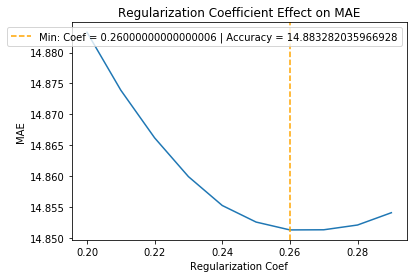

done


In [50]:

#Ridge Regression
print("executed start")
reg_coef_list = np.arange(.2, .3, .01) #np.concatenate( (np.arange(0.05, 1.0, 0.05),np.arange(1, 10.0, 1)), axis=None) 
mae_list = []

for coef in reg_coef_list:
    start = time.process_time()
    linreg = linear_model.Ridge(normalize = True, alpha=coef, max_iter=5000)
    linreg.fit(X=X_train, y=y_train)
    y_pred = linreg.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, y_pred)
    mae_list.append(mae)
    end = time.process_time()
    print('Model using '+str(coef)+' as the regularization coefficient completed in '+str(round(end-start,3))+'sec')

plt.plot(reg_coef_list, mae_list)
plt.axvline(x=reg_coef_list[mae_list.index(min(mae_list))], color='orange', linestyle='--', 
            label='Min: Coef = {}'.format(reg_coef_list[mae_list.index(min(mae_list))])+' | Accuracy = {}'.format(max(mae_list)))
plt.title("Regularization Coefficient Effect on MAE")
plt.xlabel("Regularization Coef")
plt.ylabel("MAE")
plt.legend()
plt.show()
print("done")

Accuracy Range for Linear Regression is: 14 days


# Linear Regression Across Just Late Days

In [51]:
clean_df1 = clean_df.drop(index = clean_df.loc[lambda df: df['DAYS_TO_PAY'] < 0].index)
for el in pd.unique(clean_df1['DAYS_TO_PAY']):
    print(el)

95.0
5.0
10.0
13.0
2.0
8.0
36.0
51.0
79.0
3.0
11.0
40.0
25.0
123.0
41.0
15.0
12.0
19.0
6.0
29.0
27.0
46.0
16.0
1.0
84.0
61.0
17.0
38.0
53.0
9.0
55.0
20.0
117.0
32.0
22.0
60.0
70.0
42.0
4.0
82.0
37.0
102.0
67.0
26.0
34.0
113.0
33.0
43.0
49.0
65.0
21.0
45.0
39.0
7.0
54.0
56.0
72.0
14.0
44.0
210.0
88.0
62.0
35.0
63.0
179.0
52.0
24.0
68.0
251.0
112.0
57.0
23.0
50.0
48.0
28.0
0.0
121.0
81.0
18.0
74.0
47.0
89.0
160.0
31.0
246.0
77.0
119.0
80.0
203.0
59.0
143.0
92.0
122.0
91.0
58.0
66.0
73.0
93.0
71.0
30.0
87.0
86.0
120.0
180.0
149.0
147.0
130.0
125.0
111.0
99.0
168.0
148.0
105.0
126.0
153.0
76.0
140.0
78.0
190.0
100.0
186.0
98.0
103.0
144.0
109.0
97.0
135.0
193.0
136.0
127.0
101.0
173.0
138.0
145.0
199.0
132.0
108.0
141.0
129.0
96.0
85.0
202.0
75.0
169.0
114.0
154.0
128.0
69.0
221.0
137.0
253.0
182.0
234.0
116.0
268.0
146.0
155.0
64.0
164.0
191.0
163.0
90.0
106.0
240.0
183.0
83.0
167.0
216.0
104.0
171.0
187.0
241.0
214.0
94.0
184.0
142.0
157.0
269.0
124.0
176.0
222.0
170.0
185.0
110.0
195.0


In [52]:
X = clean_df1.loc[:, clean_df1.columns != "DAYS_TO_PAY"]
y = clean_df1['DAYS_TO_PAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print("done")

done


executed start
Model using 0.15 as the regularization coefficient completed in 0.187sec
Model using 0.155 as the regularization coefficient completed in 0.158sec
Model using 0.16 as the regularization coefficient completed in 0.161sec
Model using 0.165 as the regularization coefficient completed in 0.185sec
Model using 0.17 as the regularization coefficient completed in 0.187sec
Model using 0.17500000000000002 as the regularization coefficient completed in 0.198sec
Model using 0.18000000000000002 as the regularization coefficient completed in 0.181sec
Model using 0.18500000000000003 as the regularization coefficient completed in 0.162sec
Model using 0.19000000000000003 as the regularization coefficient completed in 0.155sec
Model using 0.19500000000000003 as the regularization coefficient completed in 0.159sec
Model using 0.20000000000000004 as the regularization coefficient completed in 0.17sec
Model using 0.20500000000000004 as the regularization coefficient completed in 0.182sec
Mod

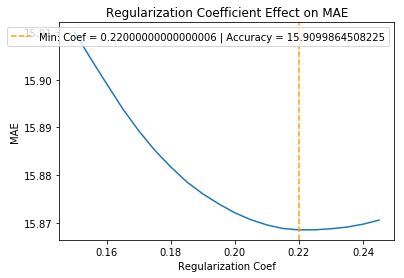

done


In [53]:

#Ridge Regression
print("executed start")
reg_coef_list = np.arange(.15, .25, .005) #np.concatenate( (np.arange(0.05, 1.0, 0.05),np.arange(1, 10.0, 1)), axis=None) 
mae_list = []

for coef in reg_coef_list:
    start = time.process_time()
    linreg = linear_model.Ridge(normalize = True, alpha=coef, max_iter=5000)
    linreg.fit(X=X_train, y=y_train)
    y_pred = linreg.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, y_pred)
    mae_list.append(mae)
    end = time.process_time()
    print('Model using '+str(coef)+' as the regularization coefficient completed in '+str(round(end-start,3))+'sec')

plt.plot(reg_coef_list, mae_list)
plt.axvline(x=reg_coef_list[mae_list.index(min(mae_list))], color='orange', linestyle='--', 
            label='Min: Coef = {}'.format(reg_coef_list[mae_list.index(min(mae_list))])+' | Accuracy = {}'.format(max(mae_list)))
plt.title("Regularization Coefficient Effect on MAE")
plt.xlabel("Regularization Coef")
plt.ylabel("MAE")
plt.legend()
plt.show()
print("done")

Accuracy Range is 16 days

# SVR Test

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as metrics
print("executed")
#below code from sklearn documentaion
# #############################################################################
# Fit regression model
svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = svm.SVR(kernel='linear', C=100, gamma='auto')
svr_poly = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
#end documentation code

print("svrs created")
clf_rbf = svr_rbf.fit(X_train, y_train)
clf_lin = svr_lin.fit(X_train, y_train)
clf_poly = svr_poly.fit(X_train, y_train)
print("classifiers created")
pred_rbf = svr_rbf.predict(X_valid)
pred_lin = svr_lin.predict(X_valid)
pred_poly = svr_poly.predict(X_valid)


print("Mean absolute error with rbf kernel is ", metrics.mean_absolute_error(y_valid, pred_rbf))
print("Mean absolute error with linear kernel is ", metrics.mean_absolute_error(y_valid, pred_lin))
print("Mean absolute error with polynomial kernel is ", metrics.mean_absolute_error(y_valid, pred_poly))

executed
svrs created
